In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py, copy
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

# choose file either with the run number (first cell) or widget (second cell)

In [3]:
pgroup='p20774'
runnumber = 424
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
jsonfile

run: 0424


'/sf/alvra/data/p20774/raw/run0424-RuRhTEA_ClK_monoscan_2ps_001/meta/scan.json'

In [4]:
#fc = FileChooser('/sf/alvra/data/p20269/raw')
#fc.use_dir_icons = True
#display(fc)


In [5]:
#jsonfile = copy.copy(fc.selected)
#jsonfile

In [6]:
quantile_corr = 0.5

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

reducedir='../Claudio/Reduced_XANES/'

#######################################################################################################
#run_array = {}
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

(DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
 DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, 
 Izero_pump, Izero_unpump, correlation1, correlation2, 
 Energy_eV, goodshots1, goodshots2) = XAS_scan_2diodes(scan, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)

run_name = jsonfile.split('/')[-3]
os.makedirs(reducedir+run_name, exist_ok=True)

save_data_XANES_2diodes(reducedir, run_name, Energy_eV,
                        DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, goodshots1,
                        DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, goodshots2)


Processing: run0424-RuRhTEA_ClK_monoscan_2ps_001
Step 37 of 37: Processing acq0037

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 4 / 4 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 495 pump and 495 unpump shots
(123,) shots out of (495,) survived
(115,) shots out of (495,) survived
Step 37 of 37: Processed acq0037
correlation Diode1 (all shots) = 0.9971489181908515
correlation Diode2 (all shots) = 0.9938370401440433
------------------------------
Processed 37 out of 37 files


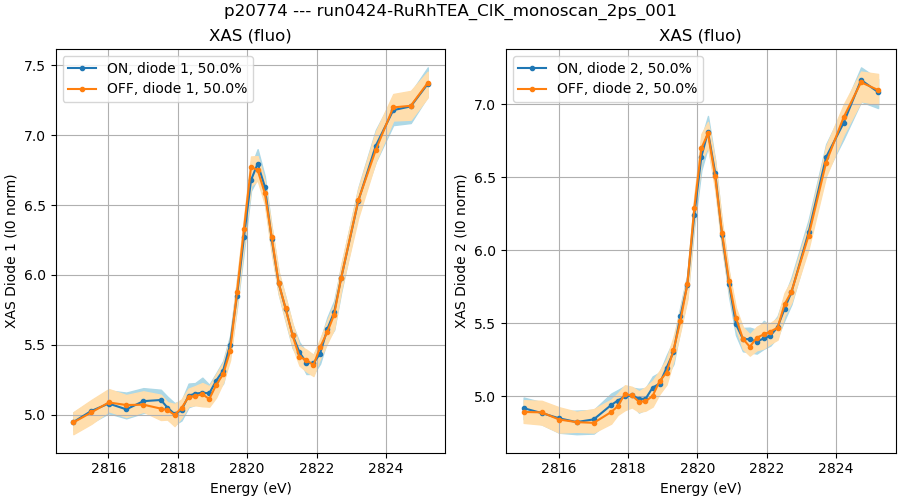

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring, fontsize = 12)

#Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS1_pump = DataDiode1_pump[:,0]
err1_low_pump = DataDiode1_pump[:,1]
err1_high_pump = DataDiode1_pump[:,2]
XAS1_unpump = DataDiode1_unpump[:,0]
err1_low_unpump = DataDiode1_unpump[:,1]
err1_high_unpump = DataDiode1_unpump[:,2]
XAS1_pump_probe = Pump_probe_Diode1[:,0]
err1_low_pump_probe = Pump_probe_Diode1[:,1]
err1_high_pump_probe = Pump_probe_Diode1[:,2]

XAS2_pump = DataDiode2_pump[:,0]
err2_low_pump = DataDiode2_pump[:,1]
err2_high_pump = DataDiode2_pump[:,2]
XAS2_unpump = DataDiode2_unpump[:,0]
err2_low_unpump = DataDiode2_unpump[:,1]
err2_high_unpump = DataDiode2_unpump[:,2]
XAS2_pump_probe = Pump_probe_Diode2[:,0]
err2_low_pump_probe = Pump_probe_Diode2[:,1]
err2_high_pump_probe = Pump_probe_Diode2[:,2]

# plt.subplot(1,22,1)
ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')
#ax1.set_xlim(2462,2480)

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')
#ax2.set_ylim(0.8,1.5)
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS Diode 2 (I0 norm)")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

plt.show()
#plt.savefig('/das/work/p18/p18387/exported_data/L-cystine_XAS.png')


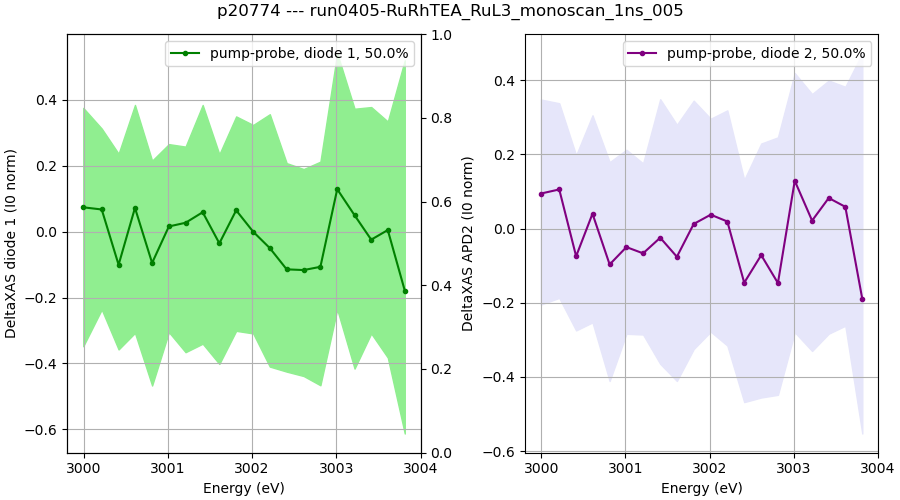

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring, fontsize = 12)

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100),color='green', marker='.')
ax1.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')

ax3 = ax1.twinx()

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS diode 1 (I0 norm)")
ax1.set_title('')
ax1.legend(loc="best")
#ax1.set_ylim(-0.1,0.13)
ax1.grid()
# plt.tight_layout()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100),color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
#ax2.set_ylim(-0.08,0.1)

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("DeltaXAS APD2 (I0 norm)")
ax2.set_title('')
ax2.legend(loc="best")
ax2.grid()
# plt.tight_layout()


plt.show()


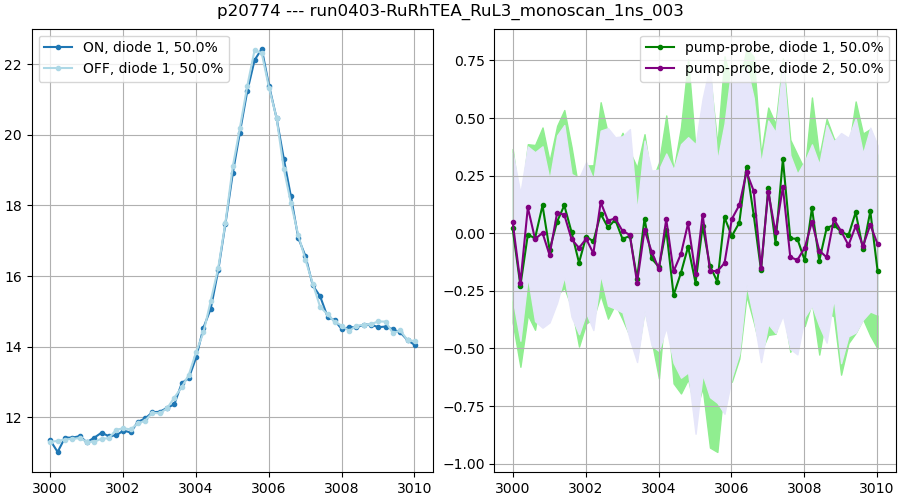

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring, fontsize = 12) 

ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.', color='lightblue')

#ax1.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
#ax1.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.', color='navajowhite')

ax1.legend(loc="best")

ax1.grid()
#ax1.set_ylim(0.7,1.5)


ax2.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100), color='green', marker='.')
ax2.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100), color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
ax2.legend(loc="best")
ax2.grid()
#ax2.set_ylim(-0.06,0.1)

plt.show()


## Error Bars

In [135]:
#### CH1 ####
XAS1_pump      = DataDiode1_pump[:,0]
err1_low_pump  = (DataDiode1_pump[:,1]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)
err1_high_pump = (DataDiode1_pump[:,2]-DataDiode1_pump[:,0])/np.sqrt(goodshots1)

XAS1_unpump      = DataDiode1_unpump[:,0]
err1_low_unpump  = (DataDiode1_unpump[:,1]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)
err1_high_unpump = (DataDiode1_unpump[:,2]-DataDiode1_unpump[:,0])/np.sqrt(goodshots1)

XAS1_pump_probe       = Pump_probe_Diode1[:,0]
err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)

#### CH2 ####
XAS2_pump        = DataDiode2_pump[:,0]
err2_low_pump    = (DataDiode2_pump[:,1]-DataDiode2_pump[:,0])/np.sqrt(goodshots2)
err2_high_pump   = (DataDiode2_pump[:,2]-DataDiode2_pump[:,0])/np.sqrt(goodshots2)

XAS2_unpump      = DataDiode2_unpump[:,0]
err2_low_unpump  = (DataDiode2_unpump[:,1]-DataDiode2_unpump[:,0])/np.sqrt(goodshots2)
err2_high_unpump = (DataDiode2_unpump[:,2]-DataDiode2_unpump[:,0])/np.sqrt(goodshots2)

XAS2_pump_probe       = Pump_probe_Diode2[:,0]
err2_low_pump_probe   = np.sqrt(err2_low_pump**2  + err2_low_unpump**2)
err2_high_pump_probe  = np.sqrt(err2_high_pump**2 + err2_high_unpump**2)


## Averaging 2 Diodes

In [136]:
##Average first, subtract later

ave_unpump = (XAS1_unpump-np.mean(XAS1_unpump[0:5]) + XAS2_unpump-np.mean(XAS2_unpump[0:5]))/2        ### subtracts the baseline
ave_unpump_err_l = np.sqrt(err1_low_unpump**2+err2_low_unpump**2)
ave_unpump_err_h = np.sqrt(err1_high_unpump**2+err1_high_unpump**2)

ave_pump = (XAS1_pump-np.mean(XAS1_pump[0:5]) + XAS2_pump-np.mean(XAS2_pump[0:5]))/2                  ### subtracts the baseline
ave_pump_err_l = np.sqrt(err1_low_pump**2+err2_low_pump**2)
ave_pump_err_h = np.sqrt(err1_high_pump**2+err1_high_pump**2)

ave_pp1 = ave_pump - ave_unpump
ave_pp_err_l1 = np.sqrt(ave_unpump_err_l**2+ave_pump_err_l**2)
ave_pp_err_h1 = np.sqrt(ave_unpump_err_h**2+ave_pump_err_h**2)

## Plotting Averaged Diodes with error bars

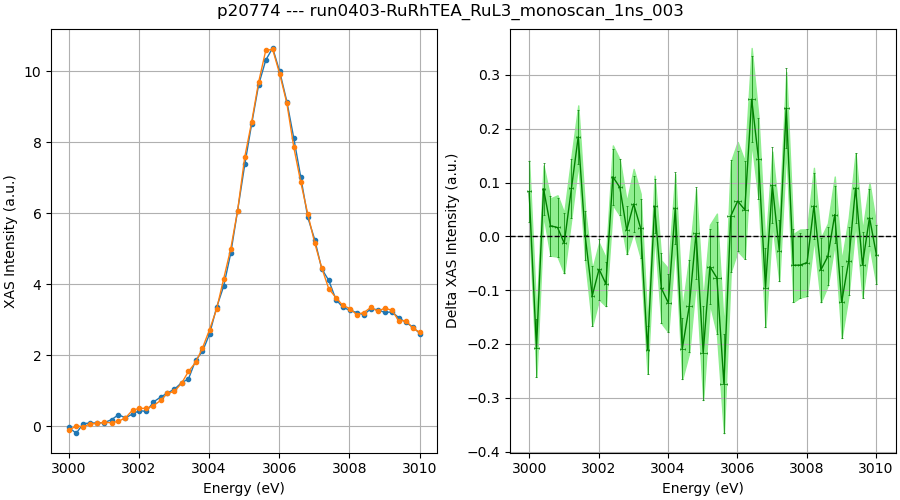

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring)

ax1.plot(Energy_eV,ave_pump,lw=1,marker='o',markersize=3,label='ON')
ax1.plot(Energy_eV,ave_unpump,lw=1,marker='o',markersize=3,label='OFF')
ax1.grid()
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS Intensity (a.u.)')

## Difference of the Averages (probably more correct)
ax2.axes.errorbar(Energy_eV, ave_pp1, ave_pp_err_l1, ave_pp_err_h1, 
              lw=1,color='green', markersize=0,capsize=1,capthick=0.5,
                   ecolor='green',elinewidth=0.5,label='pump-probe')
ax2.fill_between(Energy_eV,ave_pp1-ave_pp_err_l1, ave_pp1+ave_pp_err_h1,color='lightgreen')

ax2.grid()
ax2.axhline(0,ls='--',c='k',lw=1)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Delta XAS Intensity (a.u.)')
plt.show()

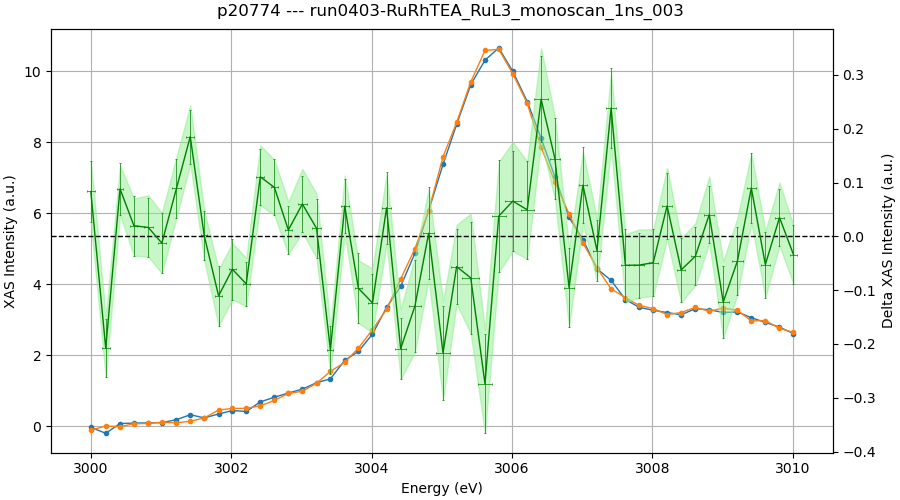

In [138]:
fig, ax1= plt.subplots(1, 1, figsize=(9, 5), constrained_layout=True)
plt.suptitle(titlestring)

ax1.plot(Energy_eV,ave_pump,lw=1,marker='o',markersize=3,label='ON') 
ax1.plot(Energy_eV,ave_unpump,lw=1,marker='o',markersize=3,label='ON') 
ax1.set_ylabel('XAS Intensity (a.u.)')
ax1.grid()
ax1.set_xlabel('Energy (eV)')

ax2 = plt.twinx(ax1)
ax2.axes.errorbar(Energy_eV, ave_pp1, ave_pp_err_l1, ave_pp_err_h1, 
              lw=1,color='green', markersize=0,capsize=1,capthick=0.5,
                   ecolor='green',elinewidth=0.5,label='pump-probe')
ax2.fill_between(Energy_eV,ave_pp1-ave_pp_err_l1, ave_pp1+ave_pp_err_h1,color='lightgreen', alpha=0.5)
ax2.axhline(0,ls='--',c='k',lw=1)
ax2.set_ylabel('Delta XAS Intensity (a.u.)')
plt.show()

## Check correlation for a certain energy point

### For a single diode, ON & OFF

In [9]:
chosen_energy = 2821

detector_XAS = channel_diode_1
detector_Izero = channel_Izero110

quantile_corr = 0.5
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(119,) shots out of (493,) survived
Correlation (all shots)      = 0.9964706159818074
Correlation (filtered shots) = 0.9996902917304934
Energy = 2821.108951002551 eV


In [10]:
from scipy import stats
#m,b = np.polyfit(Izero_pump,Fluo_pump, 1)
#m_filter,b_filter = np.polyfit(Izero_pump_filter,Fluo_pump_filter, 1)
m_median = np.median(Fluo_pump/Izero_pump)
m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)
print ("Median (all) = {}, Median (filtered) = {}".format(m_median, m_median_filter))

MAD = stats.median_absolute_deviation(Fluo_pump/Izero_pump)
MAD_filter = stats.median_absolute_deviation(Fluo_pump_filter/Izero_pump_filter)

print ("MAD (all) = {}, MAD(filtered) = {}".format(MAD, MAD_filter))

print ("MAD/median (all) = {}%, MAD/median (filtered) = {}%".format(MAD/m_median*100, MAD_filter/m_median_filter*100))

Median (all) = 5.719924016349298, Median (filtered) = 5.727390905331343
MAD (all) = 0.1605547153794298, MAD(filtered) = 0.07534406979415735
MAD/median (all) = 2.806937905477681%, MAD/median (filtered) = 1.3155042328964017%


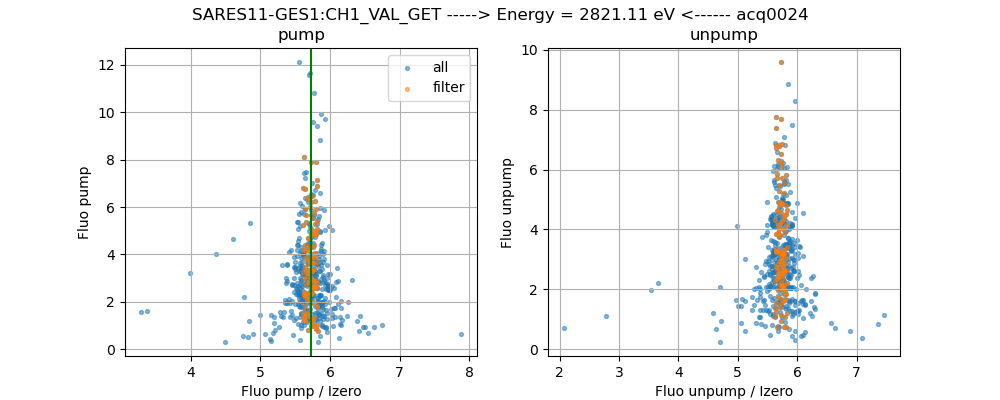

In [11]:
plt.figure(figsize=(10,4))
plt.suptitle('{} -----> Energy = {:.2f} eV <------ {}'.format(detector_XAS,Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.subplot(121)
plt.title('pump')
plt.scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
plt.axvline(x=m_median_filter, color = 'green')
plt.legend(loc='best')
plt.xlabel('Fluo pump / Izero')
plt.ylabel('Fluo pump')
plt.grid()


plt.subplot(122)
plt.title('unpump')
plt.scatter(Fluo_unpump/Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_unpump_filter/Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
plt.xlabel('Fluo unpump / Izero')
plt.ylabel('Fluo unpump')
plt.grid()
plt.show()

### For 2 diodes, (only ON)

(119,) shots out of (495,) survived


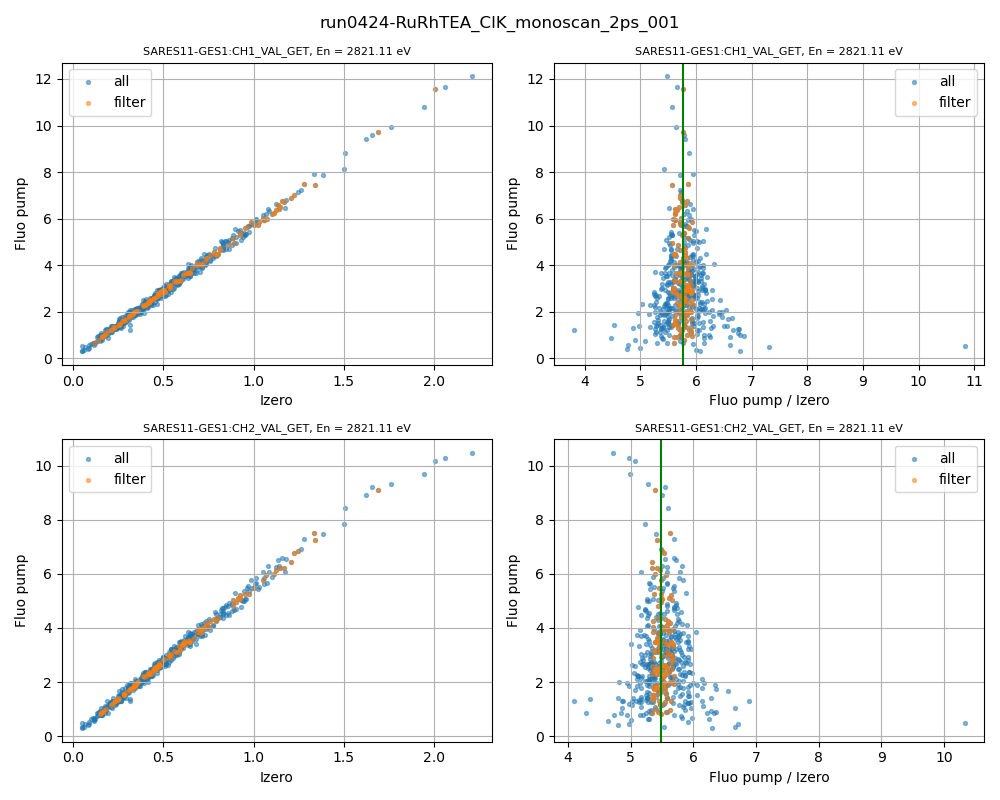

In [13]:
chosen_energy = 2821

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

quantile_corr = 0.5
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

fig,ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle(jsonfile.split('/')[-3], fontsize = 12)

ax[0][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[0][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Izero')
ax[0][0].set_ylabel('Fluo pump')
ax[0][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[0][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[0][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0][1].legend(loc='best')
ax[0][1].set_xlabel('Fluo pump / Izero')
ax[0][1].set_ylabel('Fluo pump')
ax[0][1].axvline(x=m_median_filter, color = 'green')
ax[0][1].grid()

#################################################################

detector_XAS = channel_diode_2

#################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

ax[1][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[1][0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[1][0].legend(loc='best')
ax[1][0].set_xlabel('Izero')
ax[1][0].set_ylabel('Fluo pump')
ax[1][0].grid()

m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)

ax[1][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][1].scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[1][1].scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[1][1].legend(loc='best')
ax[1][1].set_xlabel('Fluo pump / Izero')
ax[1][1].set_ylabel('Fluo pump')
ax[1][1].axvline(x=m_median_filter, color = 'green')
ax[1][1].grid()

plt.tight_layout()

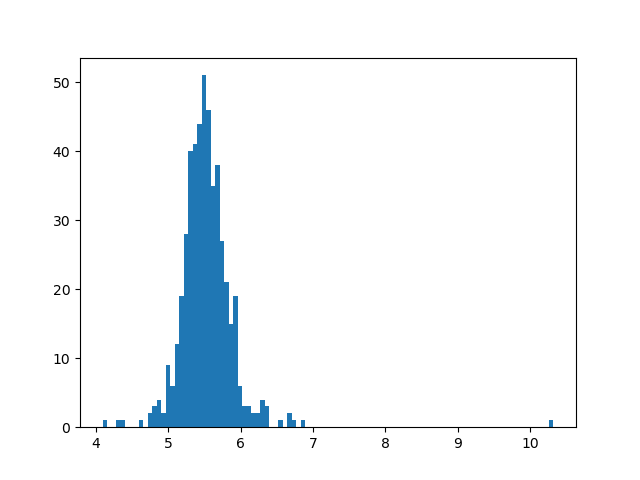

In [16]:
plt.figure()
plt.hist(Fluo_pump/Izero_pump, bins=100)
plt.show()

## Process files in a loop

In [24]:
pgroup='p20572'
runlist = [264, 265, 299]
#runlist = np.arange(241, 244, 1)

print ('{} runs: {}'.format(len(runlist),runlist))

#############################################################
from itertools import chain
jsonlist = []
for run in runlist:
    file = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))
    jsonlist.append(file)
jsonlist = itertools.chain.from_iterable(jsonlist)
jsonlist = sorted(jsonlist, key = os.path.getmtime)
jsonlist

3 runs: [264, 265, 299]


['/sf/alvra/data/p20572/raw/run0264-MB_H20_20mM_XAS_1000fs/meta/scan.json',
 '/sf/alvra/data/p20572/raw/run0265-MB_H20_20mM_XAS_10000fs/meta/scan.json',
 '/sf/alvra/data/p20572/raw/run0299-MB_EtOH_10mM_XAS_50000fs/meta/scan.json']

In [25]:
quantile_corr = 0.4

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero110

reducedir='../Claudio/Reduced_XANES/'

#######################################################################################################33
from sfdata import SFScanInfo
import itertools

DataDiode1_pump_all = []
DataDiode1_unpump_all = []
Pump_probe1_all = []

DataDiode2_pump_all = []
DataDiode2_unpump_all = []
Pump_probe2_all = []

for json_file in jsonlist:
    scan = SFScanInfo(json_file)
    scan = remove_JF_from_scan(scan)
        
    DataDiode1_pump = []
    DataDiode1_unpump = []
    Pump_probe_Diode1 = []
    
    DataDiode2_pump = []
    DataDiode2_unpump = []
    Pump_probe_Diode2 = []
    
    (DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
     DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, _, _, _, _, 
     Energy_eV, goodshots1, goodshots2) = XAS_scan_2diodes(scan, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)
    
    DataDiode1_pump_all.append(DataDiode1_pump)
    DataDiode1_unpump_all.append(DataDiode1_unpump)
    Pump_probe1_all.append(Pump_probe_Diode1)    
    
    DataDiode2_pump_all.append(DataDiode2_pump)
    DataDiode2_unpump_all.append(DataDiode2_unpump)
    Pump_probe2_all.append(Pump_probe_Diode2) 
    
    run_name = json_file.split('/')[-3]
    os.makedirs(reducedir+run_name, exist_ok=True)
    
    save_data_XANES_2diodes(reducedir, run_name, Energy_eV,
                        DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, goodshots1,
                        DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, goodshots2)

DataDiode1_pump_all = np.array(DataDiode1_pump_all)
DataDiode1_unpump_all = np.array(DataDiode1_unpump_all)
Pump_probe1_all = np.array(Pump_probe1_all)
DataDiode2_pump_all = np.array(DataDiode2_pump_all)
DataDiode2_unpump_all = np.array(DataDiode2_unpump_all)
Pump_probe2_all = np.array(Pump_probe2_all)


Processing: run0299-MB_EtOH_10mM_XAS_50000fs
Step 77 of 77: Processing acq0077

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY  988 / 1001 -> 1% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 988 / 1001 -> 1% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 486 pump and 486 unpump shots
(79,) shots out of (486,) survived
(79,) shots out of (486,) survived
Step 77 of 77: Processed acq0077
correlation Diode1 (all shots) = 0.9725594992701584
correlation Diode2 (all shots) = 0.005091222375452117
